In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
fake_transaction = pd.read_csv('simulated_transaction_2024.csv')

In [63]:
fake_transaction

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.000000,780.00,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face
...,...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,NaN,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,NaN,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,NaN,Amazon


In [64]:
fake_transaction.columns

Index(['Date', 'Timestamp', 'Account No', 'Balance', 'Amount',
       'Third Party Account No', 'Third Party Name'],
      dtype='object')

In [65]:
fake_transaction = fake_transaction[['Date', 'Timestamp', 'Account No', 'Balance', 'Amount', 'Third Party Name']]

In [66]:
fake_transaction

,Date,Timestamp,Account No,Balance,Amount,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.000000,1584.00,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.000000,1950.00,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.000000,-780.00,NaN
3,01/01/2023,00:00,283027736.0,1787.000000,780.00,NaN
4,01/01/2023,00:00,624500124.0,3226.000000,1825.00,Fat Face
...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,Amazon


In [67]:
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230596 entries, 0 to 230595
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              230367 non-null  object 
 1   Timestamp         230345 non-null  object 
 2   Account No        230372 non-null  float64
 3   Balance           230350 non-null  float64
 4   Amount            230387 non-null  float64
 5   Third Party Name  223517 non-null  object 
dtypes: float64(3), object(3)
memory usage: 10.6+ MB


In [68]:
fake_transaction.isnull().sum()

Date                 229
Timestamp            251
Account No           224
Balance              246
Amount               209
Third Party Name    7079
dtype: int64

In [69]:
fake_transaction.dropna(subset=['Third Party Name'], inplace=True)

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_38296/653314486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_transaction.dropna(subset=['Third Party Name'], inplace=True)


In [70]:
fake_transaction['Date'] = pd.to_datetime(fake_transaction['Date'], format='%d/%m/%Y')
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223517 entries, 0 to 230595
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              223293 non-null  datetime64[ns]
 1   Timestamp         223271 non-null  object        
 2   Account No        223297 non-null  float64       
 3   Balance           223277 non-null  float64       
 4   Amount            223317 non-null  float64       
 5   Third Party Name  223517 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 11.9+ MB


/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_38296/2944397103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_transaction['Date'] = pd.to_datetime(fake_transaction['Date'], format='%d/%m/%Y')


In [71]:
fake_transaction.isnull().sum()

Date                224
Timestamp           246
Account No          220
Balance             240
Amount              200
Third Party Name      0
dtype: int64

In [72]:
print(fake_transaction['Amount'].mean())
print(fake_transaction['Amount'].median())
print(fake_transaction['Amount'].mode()[0])

6.879775700013879
-28.69
-18.99


In [73]:
median_amount = fake_transaction['Amount'].median()

fake_transaction['Amount'] = fake_transaction['Amount'].fillna(median_amount)

fake_transaction

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_38296/447577542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_transaction['Amount'] = fake_transaction['Amount'].fillna(median_amount)


,Date,Timestamp,Account No,Balance,Amount,Third Party Name
0,2023-01-01,00:00,678330503.0,2971.000000,1584.00,Westport Care Home
1,2023-01-01,00:00,472213568.0,3792.000000,1950.00,Barbiee Boutique
4,2023-01-01,00:00,624500124.0,3226.000000,1825.00,Fat Face
5,2023-01-01,00:00,203466392.0,4607.660000,2841.66,Lavender Primary
6,2023-01-01,00:00,768271776.0,3620.000000,1950.00,A Cut Above
...,...,...,...,...,...,...
230591,2023-12-06,20:54,581655972.0,45935.206861,-41.06,Tesco
230592,2023-12-06,20:55,786141370.0,-244.837500,-62.35,Sainsbury Local
230593,2023-12-06,21:05,824916823.0,9709.172159,-32.94,Deliveroo
230594,2023-12-06,21:13,366550080.0,26834.165794,-19.25,Amazon


In [74]:
fake_transaction.isnull().sum()

Date                224
Timestamp           246
Account No          220
Balance             240
Amount                0
Third Party Name      0
dtype: int64

In [75]:
print(fake_transaction['Balance'].mean())
print(fake_transaction['Balance'].median())
print(fake_transaction['Balance'].mode()[0])

3676.6946254832383
1736.950800000002
10.0


In [76]:
median_balance = fake_transaction['Balance'].median()

fake_transaction['Balance'] = fake_transaction['Balance'].fillna(median_balance)

fake_transaction.isnull().sum()

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_38296/1176191090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_transaction['Balance'] = fake_transaction['Balance'].fillna(median_balance)


Date                224
Timestamp           246
Account No          220
Balance               0
Amount                0
Third Party Name      0
dtype: int64

In [77]:
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223517 entries, 0 to 230595
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              223293 non-null  datetime64[ns]
 1   Timestamp         223271 non-null  object        
 2   Account No        223297 non-null  float64       
 3   Balance           223517 non-null  float64       
 4   Amount            223517 non-null  float64       
 5   Third Party Name  223517 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 11.9+ MB


In [78]:
fake_transaction['Timestamp'] = pd.to_datetime(fake_transaction['Timestamp'], errors='coerce')  # Convert to datetime, coercing errors

min_date = fake_transaction['Timestamp'].min()
fake_transaction['Timestamp'].fillna(min_date, inplace=True)

/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_38296/1703710747.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fake_transaction['Timestamp'] = pd.to_datetime(fake_transaction['Timestamp'], errors='coerce')  # Convert to datetime, coercing errors
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_38296/1703710747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_transaction['Timestamp'] = pd.to_datetime(fake_transaction['Timestamp'], errors='coerce')  # Convert to datetime, coercing errors
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_38296/1703710747.py:4: SettingW

In [79]:
fake_transaction

,Date,Timestamp,Account No,Balance,Amount,Third Party Name
0,2023-01-01,2024-03-26 00:00:00,678330503.0,2971.000000,1584.00,Westport Care Home
1,2023-01-01,2024-03-26 00:00:00,472213568.0,3792.000000,1950.00,Barbiee Boutique
4,2023-01-01,2024-03-26 00:00:00,624500124.0,3226.000000,1825.00,Fat Face
5,2023-01-01,2024-03-26 00:00:00,203466392.0,4607.660000,2841.66,Lavender Primary
6,2023-01-01,2024-03-26 00:00:00,768271776.0,3620.000000,1950.00,A Cut Above
...,...,...,...,...,...,...
230591,2023-12-06,2024-03-26 20:54:00,581655972.0,45935.206861,-41.06,Tesco
230592,2023-12-06,2024-03-26 20:55:00,786141370.0,-244.837500,-62.35,Sainsbury Local
230593,2023-12-06,2024-03-26 21:05:00,824916823.0,9709.172159,-32.94,Deliveroo
230594,2023-12-06,2024-03-26 21:13:00,366550080.0,26834.165794,-19.25,Amazon


In [80]:
fake_transaction = fake_transaction.drop(columns=['Timestamp'])

fake_transaction

,Date,Account No,Balance,Amount,Third Party Name
0,2023-01-01,678330503.0,2971.000000,1584.00,Westport Care Home
1,2023-01-01,472213568.0,3792.000000,1950.00,Barbiee Boutique
4,2023-01-01,624500124.0,3226.000000,1825.00,Fat Face
5,2023-01-01,203466392.0,4607.660000,2841.66,Lavender Primary
6,2023-01-01,768271776.0,3620.000000,1950.00,A Cut Above
...,...,...,...,...,...
230591,2023-12-06,581655972.0,45935.206861,-41.06,Tesco
230592,2023-12-06,786141370.0,-244.837500,-62.35,Sainsbury Local
230593,2023-12-06,824916823.0,9709.172159,-32.94,Deliveroo
230594,2023-12-06,366550080.0,26834.165794,-19.25,Amazon


In [81]:
fake_transaction = fake_transaction.dropna()

In [82]:
fake_transaction['Date'] = pd.to_datetime(fake_transaction['Date'])
fake_transaction['Month'] = fake_transaction['Date'].dt.month

fake_transaction = fake_transaction.groupby(['Month', 'Account No', 'Third Party Name']).agg({
    'Balance': 'sum',  
    'Amount': 'sum',   
}).reset_index()

print(fake_transaction)


        Month   Account No Third Party Name      Balance  Amount
0           1  101531259.0        Deliveroo -1089.605850  -17.69
1           1  101531259.0           Disney  -358.512050  -15.98
2           1  101531259.0  Five Senses Art   392.467950  -24.98
3           1  101531259.0  Grand Union BJJ  -141.064100 -209.99
4           1  101531259.0             Head -1071.915850 -200.00
...       ...          ...              ...          ...     ...
118661     12  999752672.0          Halifax  2037.841094 -652.00
118662     12  999752672.0   Loosely Fitted  5115.483281 -219.00
118663     12  999752672.0          Matalan  5350.644374 -382.00
118664     12  999752672.0        The Works  1012.631094  -11.98
118665     12  999752672.0          Topshop  1035.661094 -148.50

[118666 rows x 5 columns]


/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_38296/852917709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_transaction['Date'] = pd.to_datetime(fake_transaction['Date'])
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_38296/852917709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_transaction['Month'] = fake_transaction['Date'].dt.month


In [85]:
fake_transaction = fake_transaction.drop(columns='Third Party Name')
fake_transaction = fake_transaction.to_numpy()


In [94]:
print(f'Shape of average spend dataset',fake_transaction.shape)

# apply UMAP
umap_reducer = umap.UMAP(
    n_neighbors=100,
    min_dist=0.1,
)
embedding = umap_reducer.fit_transform(fake_transaction)

Shape of average spend dataset (118666, 4)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


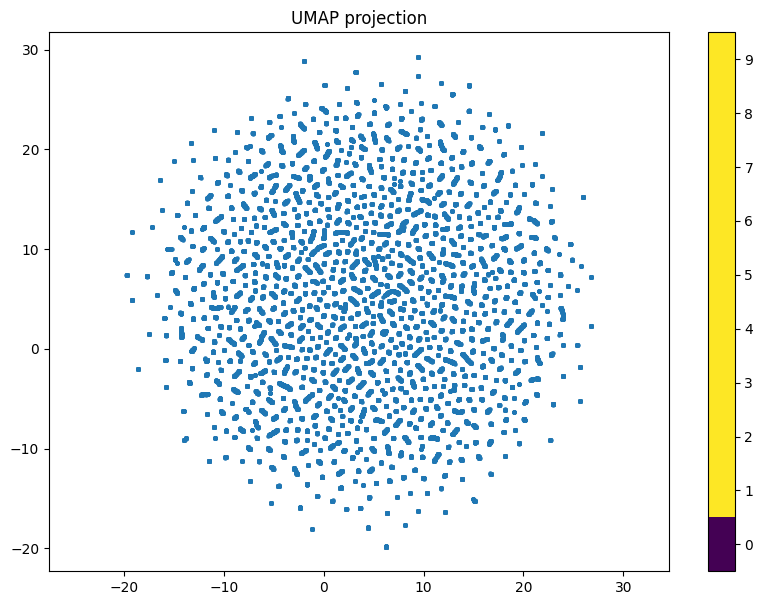

In [95]:
plt.figure(figsize=(10, 7))

plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection');

In [96]:
print(f'Shape of average spend dataset',fake_transaction.shape)

# apply UMAP
umap_reducer = umap.UMAP(
    n_neighbors=5,
    min_dist=0.0,
)
embedding = umap_reducer.fit_transform(fake_transaction)

Shape of average spend dataset (118666, 4)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


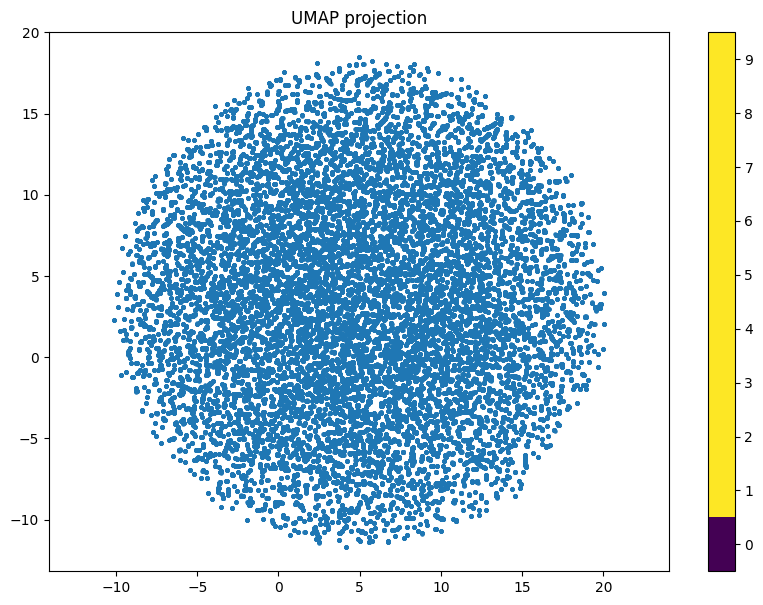

In [97]:
plt.figure(figsize=(10, 7))

plt.scatter(embedding[:, 0], embedding[:, 1], s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection');